In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder  
ohe = OneHotEncoder(sparse=False)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
import sys
np.set_printoptions(threshold=sys.maxsize)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv("/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv")
df_orig = df.copy()



/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv
/kaggle/input/co2-emission-by-vehicles/Data Description.csv


# exploring the data

In [2]:
print("data info :")
print(df.info())
print("data shape :")
print(df.shape)

data info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  

# renaming the columns

In [3]:
df = df.rename({
    'Vehicle Class' : 'Vehicle_Class' , 
    'Engine Size(L)': 'Engine_Size' ,
    'Fuel Type' : 'Fuel_Type',
    'Fuel Consumption City (L/100 km)' : 'Fuel_Consumption_City_(L/100km)' , 
    'Fuel Consumption Hwy (L/100 km)' : 'Fuel_Consumption_Hwy_(L/100km)' ,
    'Fuel Consumption Comb (L/100 km)' : 'Fuel_Consumption_Comb_(L/100km)' ,
    'Fuel Consumption Comb (mpg)' : 'Fuel_Consumption_Comb_(mpg)' , 
    'CO2 Emissions(g/km)' : 'CO2_Emissions(g/km)'
} , axis = 1)
df.columns

Index(['Make', 'Model', 'Vehicle_Class', 'Engine_Size', 'Cylinders',
       'Transmission', 'Fuel_Type', 'Fuel_Consumption_City_(L/100km)',
       'Fuel_Consumption_Hwy_(L/100km)', 'Fuel_Consumption_Comb_(L/100km)',
       'Fuel_Consumption_Comb_(mpg)', 'CO2_Emissions(g/km)'],
      dtype='object')

# split the data to numerical data and categorical data 
**it helps in pre processing**

In [4]:
temp = []
temp2 = []
for i in df:
  if df[i].dtype=="float64" or df[i].dtype=="int64":
    temp.append(df[i])
  else:
    temp2.append(df[i])
    
df_cat = pd.DataFrame(temp2)
df_num = pd.DataFrame(temp)
df_num = df_num.T
df_cat = df_cat.T

**drop the cylinders from numerical data but not from the whole data**

In [5]:
df_num.drop(['Cylinders'], axis=1, inplace = True)

# ploting the numerical data 

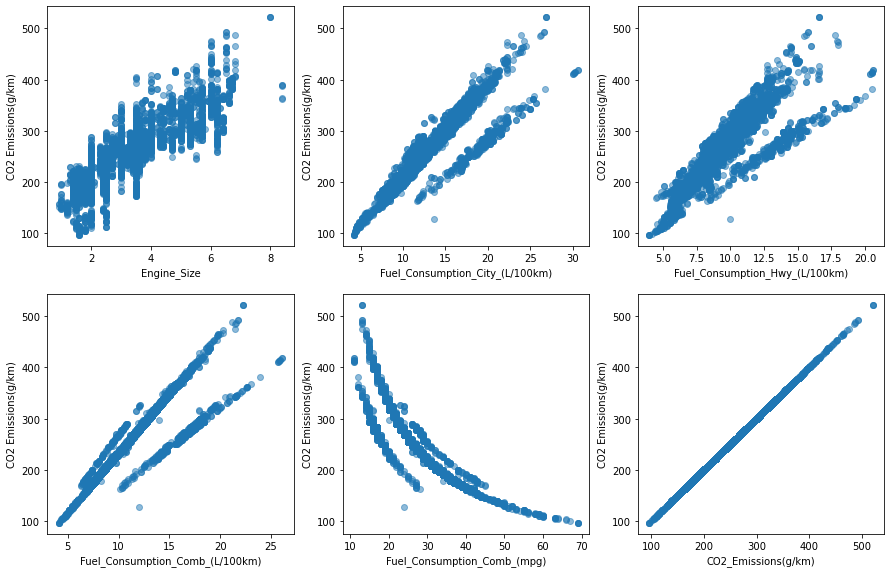

In [6]:
plt.figure(figsize = (15,15))

for  i in enumerate(df_num):
    
    plt.subplot(3,3,i[0]+1)
    x = df_num[i[1]]
    y=df_num['CO2_Emissions(g/km)']

    plt.xlabel(i[1])
    plt.ylabel("CO2 Emissions(g/km)")
  
    plt.scatter(x, y , alpha=0.5)  
   

# using boxplot to see if there are outliers 

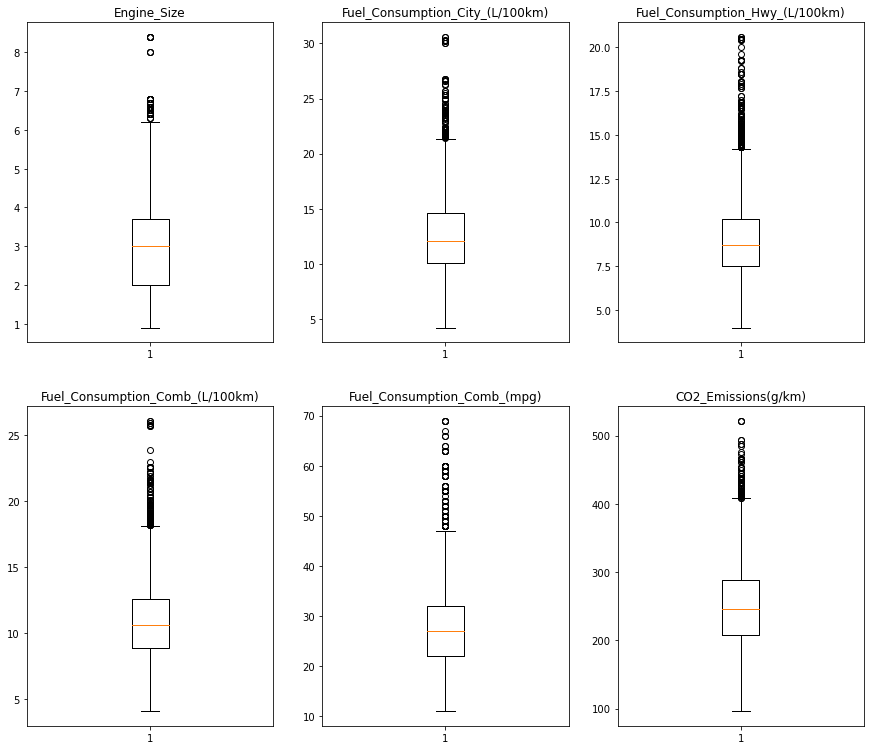

In [7]:
plt.figure(figsize = (15,20))
for i in enumerate(df_num):
    plt.subplot(3,3,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_num[i[1]])
    

**Fuel_Consumption_Comb_(mpg)** is not logic to be like that in the plot

Text(0, 0.5, 'co2 emition')

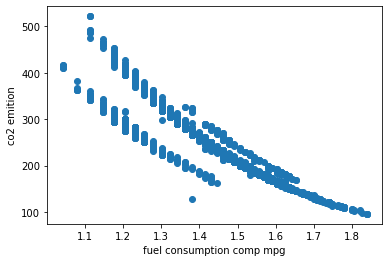

In [8]:
plt.scatter(np.log10(df['Fuel_Consumption_Comb_(mpg)']) , df['CO2_Emissions(g/km)'])
plt.xlabel("fuel consumption comp mpg")
plt.ylabel("co2 emition")

checking its correlation 

In [9]:
corr_mpg = df['Fuel_Consumption_Comb_(mpg)'].corr(df['CO2_Emissions(g/km)'])
corr_mpg

-0.9074262866541872

droping it 

In [10]:
df.drop(['Fuel_Consumption_Comb_(mpg)'], axis=1, inplace = True)
df_num.drop(['Fuel_Consumption_Comb_(mpg)'], axis=1, inplace = True)

In [11]:
df_cat

,Make,Model,Vehicle_Class,Transmission,Fuel_Type
0,ACURA,ILX,COMPACT,AS5,Z
1,ACURA,ILX,COMPACT,M6,Z
2,ACURA,ILX HYBRID,COMPACT,AV7,Z
3,ACURA,MDX 4WD,SUV - SMALL,AS6,Z
4,ACURA,RDX AWD,SUV - SMALL,AS6,Z
...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,AS8,Z
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,AS8,Z
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,AS8,Z
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS8,Z


# ploting vehicle class 

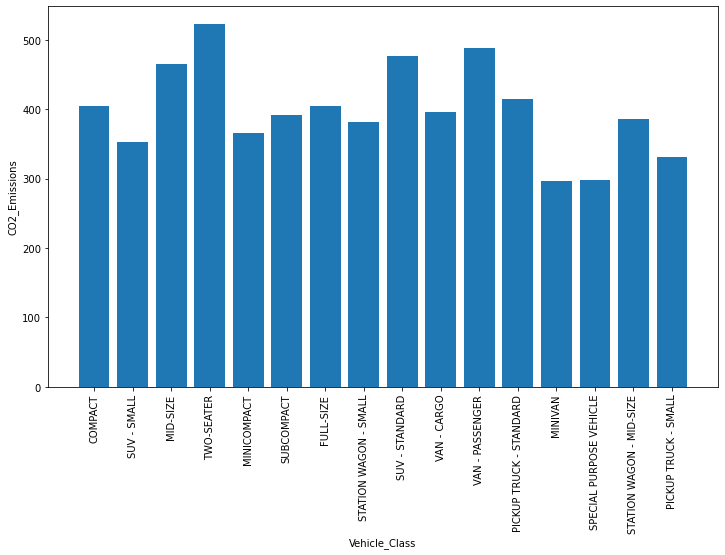

In [12]:
vehicle_classes = df['Vehicle_Class'].unique()
vehicle_classes_count =range(len(vehicle_classes))

plt.figure(figsize=(12,7))

plt.xlabel('Vehicle_Class')
plt.ylabel('CO2_Emissions')

plt.bar(df['Vehicle_Class'] , df['CO2_Emissions(g/km)'] )
plt.xticks(vehicle_classes_count ,vehicle_classes, rotation = 'vertical')
plt.show()

* N = natural gas
* E = ethanol
* D = diesel
* X = gasoline
* Z = premium gasoline

# Data preprocessing 


In [13]:
df.drop(['Model'], axis=1, inplace = True)
df.drop(['Make'], axis=1, inplace = True)

#as the combination betwween the hwy and the city has its own column
df.drop(['Fuel_Consumption_City_(L/100km)'], axis=1, inplace = True)
df.drop(['Fuel_Consumption_Hwy_(L/100km)'], axis=1, inplace = True)

df_num.drop(['Fuel_Consumption_City_(L/100km)'], axis=1, inplace = True)
df_num.drop(['Fuel_Consumption_Hwy_(L/100km)'], axis=1, inplace = True)

# using quantile function to remove outliers 

In [14]:
min_list = []
max_list = []
for  i in enumerate(df_num):
    min , max = df_num[i[1]].quantile([0.01,0.99])
    min_list.append(min)
    max_list.append(max)

In [15]:
for  i in enumerate(df_num):
    print(i[0])
    df =df[ df[i[1]] > min_list[i[0]] ]
    df =df[ df[i[1]] < max_list[i[0]] ]

0
1
2


In [16]:
print("the length of the original : " , len(df_orig))
print("the length after removing the outliers : " , len(df))

the length of the original :  7385
the length after removing the outliers :  6848


#  checking by mean and std 
* mean + 3*std > or < the max

In [17]:
df.describe()

,Engine_Size,Cylinders,Fuel_Consumption_Comb_(L/100km),CO2_Emissions(g/km)
count,6848.000000,6848.000000,6848.000000,6848.000000
mean,3.167626,5.590683,10.953899,250.987150
std,1.254798,1.687404,2.497853,51.321202
min,1.500000,3.000000,5.700000,132.000000
25%,2.000000,4.000000,9.100000,212.000000
50%,3.000000,6.000000,10.600000,247.000000
75%,3.700000,6.000000,12.600000,287.000000
max,6.400000,12.000000,19.100000,410.000000


# dealing with the catigorical attributes

In [18]:
df=pd.concat([df,pd.get_dummies(df['Vehicle_Class'],prefix='Vehicle Class',drop_first=True)],axis=1)
df.drop(['Vehicle_Class'], axis=1, inplace = True)
df=pd.concat([df,pd.get_dummies(df['Transmission'],prefix='Transmission',drop_first=True)],axis=1)
df.drop(['Transmission'], axis=1, inplace = True)
df=pd.concat([df,pd.get_dummies(df['Fuel_Type'],prefix='Fuel Type',drop_first=True)],axis=1)
df.drop(['Fuel_Type'], axis=1, inplace = True)

In [19]:
df

,Engine_Size,Cylinders,Fuel_Consumption_Comb_(L/100km),CO2_Emissions(g/km),Vehicle Class_FULL-SIZE,Vehicle Class_MID-SIZE,Vehicle Class_MINICOMPACT,Vehicle Class_MINIVAN,Vehicle Class_PICKUP TRUCK - SMALL,Vehicle Class_PICKUP TRUCK - STANDARD,...,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7,Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z
0,2.0,4,8.5,196,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.4,4,9.6,221,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1.5,4,5.9,136,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,3.5,6,11.1,255,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3.5,6,10.6,244,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,9.4,219,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7381,2.0,4,9.9,232,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7382,2.0,4,10.3,240,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7383,2.0,4,9.9,232,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# normalizing the df using minmax scaler 

In [20]:
import sklearn.preprocessing as skp
mms = skp.MinMaxScaler()

In [21]:
for  i in enumerate(df_num):
    df[i[1]] = mms.fit_transform(df[[i[1]]])
    

# spliting the data to train and test

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop(['CO2_Emissions(g/km)'], axis= 1)
y = df["CO2_Emissions(g/km)"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

# Linear regression

In [23]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train, y_train)
linear_reg.score(x_test,y_test)

0.994006300141097

# KNeighborsRegressor

In [24]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
y_pred1=knn.predict(x_test)
knn.score(x_test,y_test) 

0.9655651375976373

In [25]:
k_range=range(1,20,1)
test_records=[]
for i in k_range:
    
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    test_records.append(knn.score(x_test,y_test))



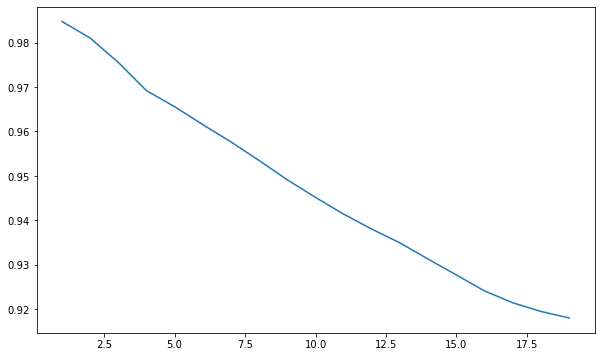

In [26]:
plt.figure(figsize=(10,6))

plt.plot(k_range,test_records,label="testing acc")

# DecisionTreeRegressor

In [27]:
from sklearn import tree
clf = tree.DecisionTreeRegressor(random_state=1, max_depth=7)
clf = clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.9923406400882218

# SVR

In [28]:
from sklearn.svm import SVR
sv = SVR(kernel='linear')
sv.fit(x_train,y_train)
y_pred = sv.predict(x_test)

print(sv.score(x_test,y_test))


0.9612093036914826


In [29]:
test_records = []
train_records = []
start=0.1
stop=1
step=0.1
float_range_array = np.arange(start, stop, step)
float_range_list = list(float_range_array)

epsilons=float_range_list
for i in epsilons:
    sv = SVR(epsilon=i,kernel='linear')
    sv.fit(x_train,y_train)
    test_records.append(sv.score(x_test,y_test))
    train_records.append(sv.score(x_train,y_train))

<function matplotlib.pyplot.show(close=None, block=None)>

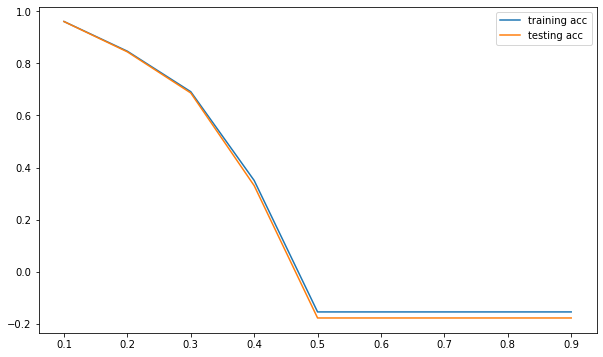

In [30]:
plt.figure(figsize=(10,6))

plt.plot(epsilons,train_records,label="training acc")
plt.plot(epsilons,test_records,label="testing acc")

plt.legend(["training acc","testing acc"])
plt.show